In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import statsmodels.stats.api as sms
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, roc_curve
%matplotlib inline

In [2]:
sns.set_style('whitegrid')
sns.set_color_codes('dark')

In [3]:
df2 = pd.read_csv('Holiday_Package.csv', index_col=False)

### EDA

In [4]:
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [5]:
df2.tail()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes
871,no,74659,51,10,0,0,yes


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holliday_Package     872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [7]:
df2.describe(include='all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [8]:
df2.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


### checking for null values

In [9]:
df2.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [10]:
df2.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [11]:
df2.shape

(872, 7)

In [12]:
df2.duplicated().sum()

0

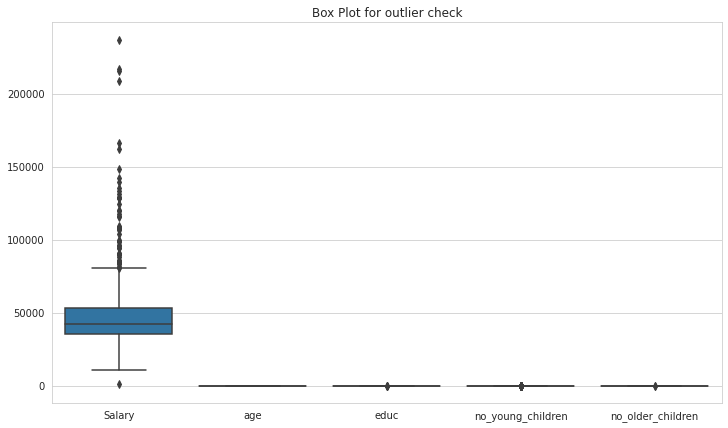

In [13]:
plt.figure(figsize=(12,7));
sns.boxplot(data=df2);
plt.title('Box Plot for outlier check');

/home/pooja/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


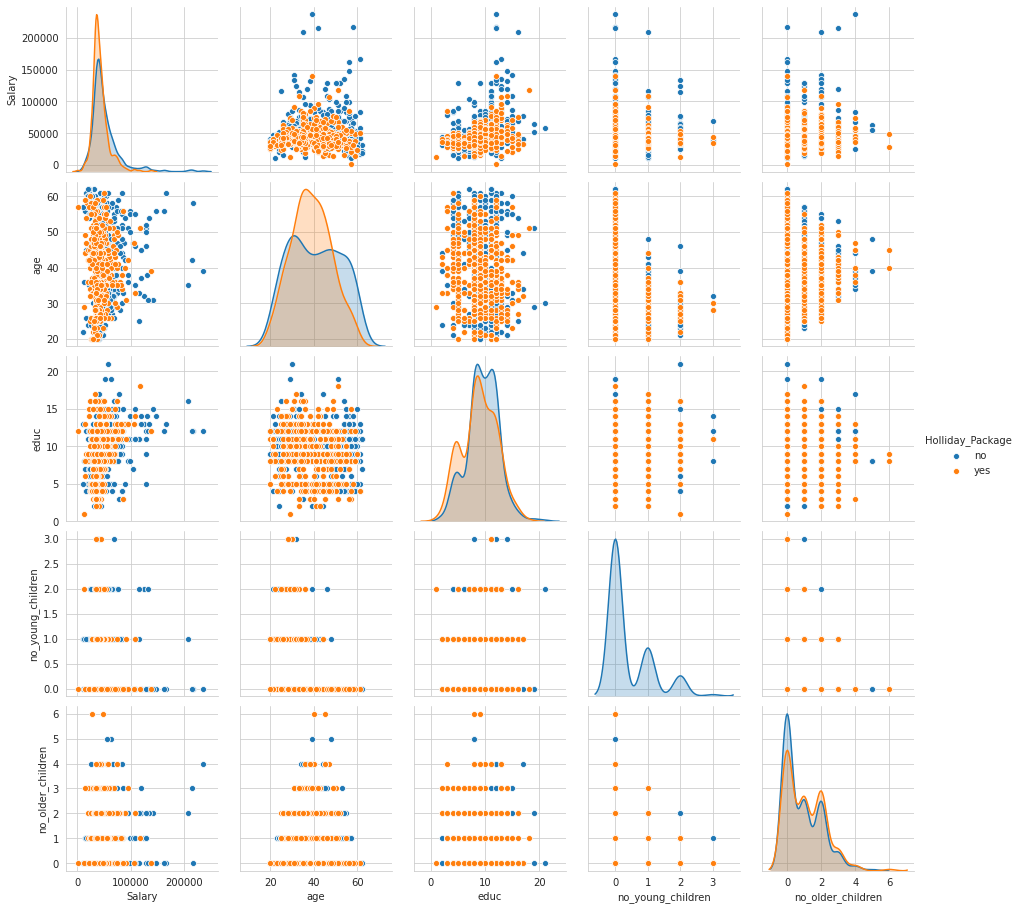

In [14]:
sns.pairplot(data=df2, hue='Holliday_Package');

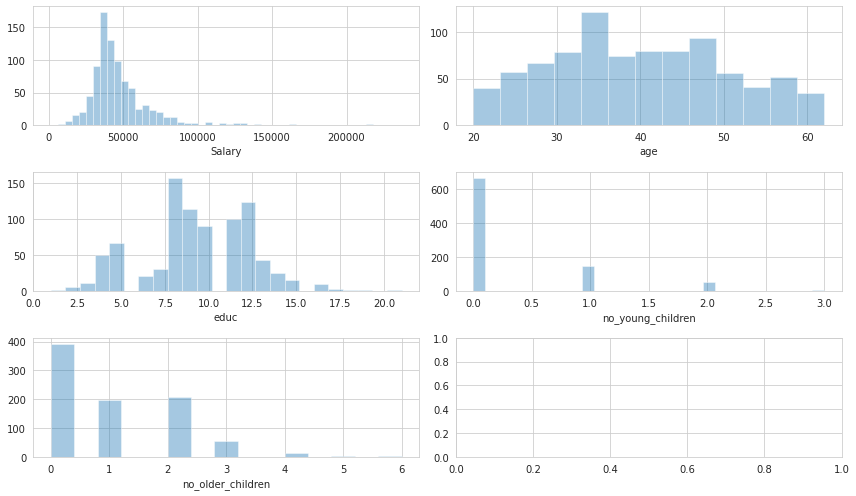

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(12,7))
row, col = 0, 0
for i in df2.columns:
    if df2[i].dtype != 'object':
        if (row < 3) & (col < 2):
            sns.distplot(df2[i], kde=False, ax=axes[row][col])
            col += 1
        else:       
            row += 1
            col = 0
            sns.distplot(df2[i], kde=False, ax=axes[row][col])
            col += 1
plt.tight_layout()    

/home/pooja/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


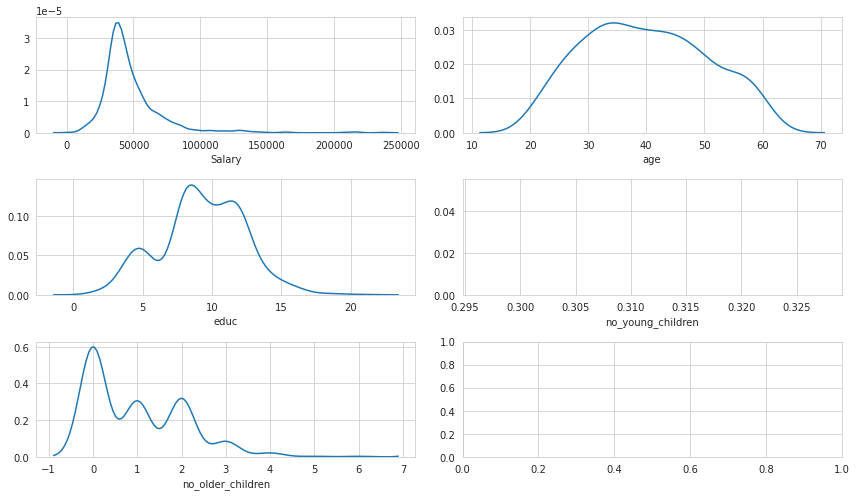

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(12,7))
row, col = 0, 0
for i in df2.columns:
    if df2[i].dtype != 'object':
        if (row < 3) & (col < 2):
            sns.distplot(df2[i], hist=False, ax=axes[row][col])
            col += 1
        else:       
            row += 1
            col = 0
            sns.distplot(df2[i], hist=False, ax=axes[row][col])
            col += 1
plt.tight_layout()    

In [17]:
# profile = df2.profile_report(title='project_report')
# profile.to_file('df2.html')

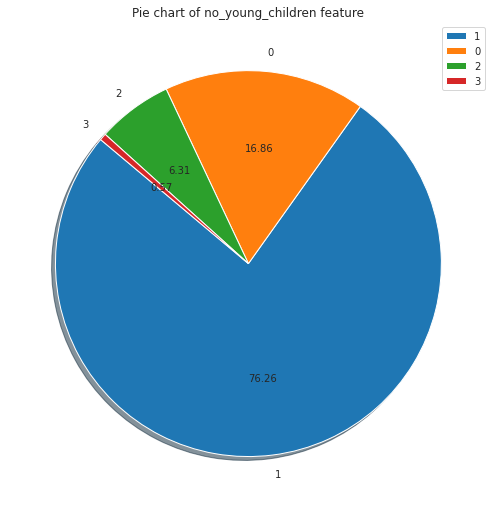

In [18]:
plt.figure(figsize=(12,7));
plt.pie(x=df2['no_young_children'].value_counts(), autopct='%0.2f', labels=df2.no_young_children.unique(), shadow=True,  startangle=140);
plt.tight_layout();
plt.legend();
plt.title("Pie chart of no_young_children feature");

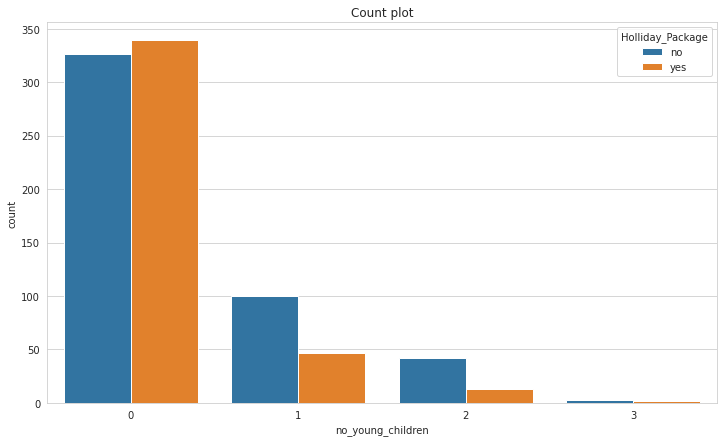

In [19]:
plt.figure(figsize=(12,7));
sns.countplot(df2['no_young_children'], hue=df2['Holliday_Package']);
plt.title('Count plot');

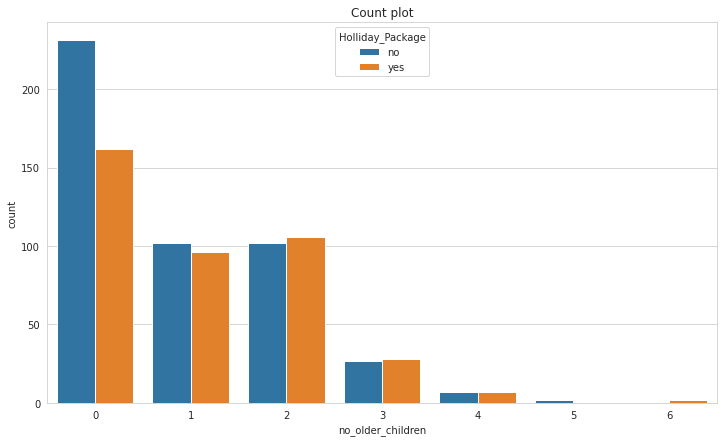

In [20]:
plt.figure(figsize=(12,7));
sns.countplot(df2['no_older_children'], hue=df2['Holliday_Package']);
plt.title('Count plot');

In [21]:
df2['total_children'] = df2['no_young_children'] + df2['no_older_children']

In [22]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign,total_children
0,no,48412,30,8,1,1,no,2
1,yes,37207,45,8,0,1,no,1
2,no,58022,46,9,0,0,no,0
3,no,66503,31,11,2,0,no,2
4,no,66734,44,12,0,2,no,2


In [23]:
df2['total_children'].value_counts()

2    284
0    271
1    211
3     80
4     22
6      2
5      2
Name: total_children, dtype: int64

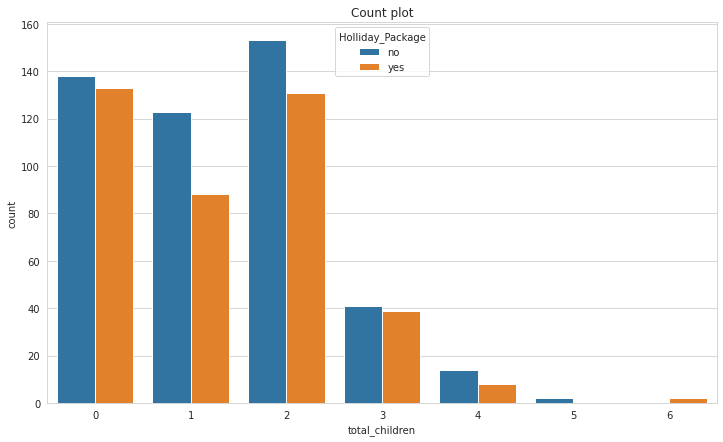

In [24]:
plt.figure(figsize=(12,7));
sns.countplot(df2['total_children'], hue=df2['Holliday_Package']);
plt.title('Count plot');

In [25]:
df2[['Holliday_Package', 'Salary']].groupby('Holliday_Package').mean()

,Salary
Holliday_Package,
no,51739.443737
yes,43018.852868


In [26]:
df2[['Holliday_Package', 'foreign']].groupby('foreign').count()

,Holliday_Package
foreign,
no,656
yes,216


In [27]:
df2[df2['Holliday_Package'] == 'yes']['foreign'].value_counts()

no     254
yes    147
Name: foreign, dtype: int64

In [28]:
df2[df2['Holliday_Package'] == 'no']['foreign'].value_counts()

no     402
yes     69
Name: foreign, dtype: int64

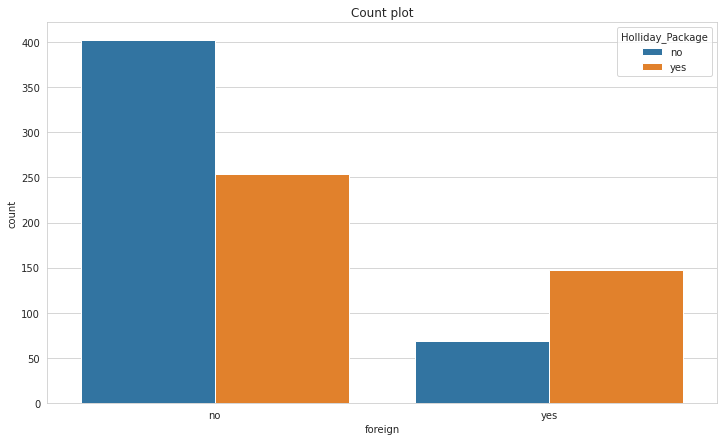

In [29]:
plt.figure(figsize=(12,7));
sns.countplot(df2['foreign'], hue=df2['Holliday_Package']);
plt.title('Count plot');

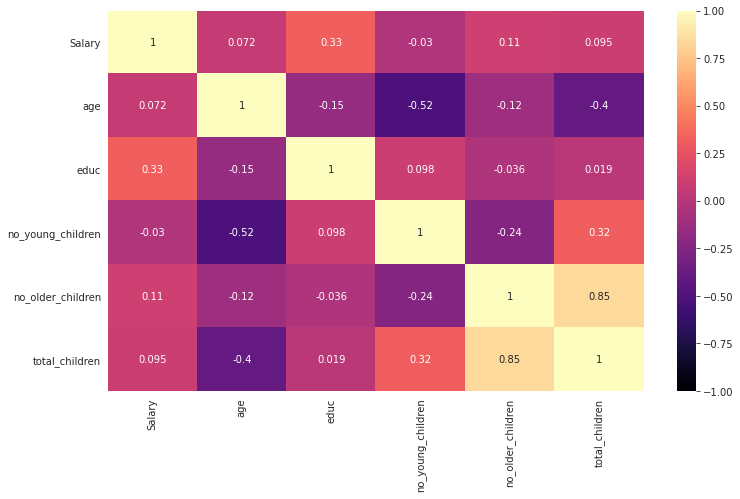

In [30]:
plt.figure(figsize=(12,7));
sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap='magma');

In [31]:
def remove_outliers(feature):
    q1 = np.quantile(feature, 0.25)
    q3 = np.quantile(feature, 0.75)    
    iqr = q3 - q1
    ll, ul = (q1 - 1.5 * iqr), (q3 + 1.5 * iqr)
    return(ll, ul)

In [32]:
for i in df2.columns:
    if df2[i].dtype == 'object':
        df2[i] = pd.Categorical(df2[i]).codes

In [33]:
for i in df2.columns:
    ll, ul = remove_outliers(df2[i])
    df2[i] = np.where(df2[i] < ll, ll, df2[i])
    df2[i] = np.where(df2[i] > ul, ul, df2[i])    

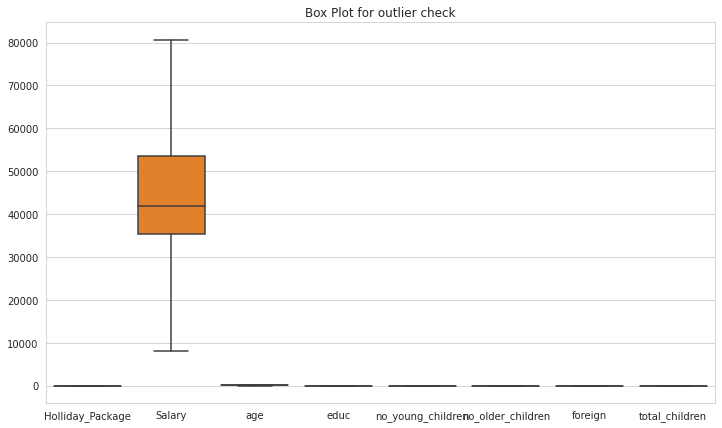

In [34]:
plt.figure(figsize=(12,7));
sns.boxplot(data=df2);
plt.title('Box Plot for outlier check');

### End of EDA

In [35]:
df2.dtypes

Holliday_Package     float64
Salary               float64
age                  float64
educ                 float64
no_young_children    float64
no_older_children    float64
foreign              float64
total_children       float64
dtype: object

In [36]:
param_grid={'penalty':['l2','none','l1'],
      'solver':['sag','lbfgs','newton-cg','saga'],
      'tol':[0.0001,0.00001]}
model = LogisticRegression(max_iter=10000, n_jobs=2)

clf = GridSearchCV(model, param_grid, cv=3)

In [37]:
X = df2.drop('Holliday_Package', axis=1)
y = df2['Holliday_Package']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

In [39]:
clf.fit(X_train, y_train)

/home/pooja/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pooja/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pooja/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/pooja/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/pooja/.local/lib/python3.8/site-packages/sklearn/

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             param_grid={'penalty': ['l2', 'none', 'l1'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'saga'],
                         'tol': [0.0001, 1e-05]})

In [40]:
clf.best_estimator_

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg')

In [41]:
clf.best_params_

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001}

In [42]:
model = clf.best_estimator_

In [43]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg')

In [44]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict_proba = model.predict_proba(X_train)
test_predict_proba = model.predict_proba(X_test)

In [45]:
train_accuracy = model.score(X_train, y_train)
train_accuracy

0.6229508196721312

In [46]:
test_accuracy = model.score(X_test, y_test)
test_accuracy

0.6679389312977099

In [47]:
print('Logistic Regression model')
print('Accuracy on training data ->', round(train_accuracy, 3))
print('Accuracy on test data ->', round(test_accuracy, 3))

Logistic Regression model
Accuracy on training data -> 0.623
Accuracy on test data -> 0.668


In [48]:
print('Train\n')
print(classification_report(y_train, train_predict))

Train

              precision    recall  f1-score   support

         0.0       0.64      0.68      0.66       326
         1.0       0.60      0.55      0.58       284

    accuracy                           0.62       610
   macro avg       0.62      0.62      0.62       610
weighted avg       0.62      0.62      0.62       610



In [49]:
print('Test\n')
print(classification_report(y_test, test_predict))

Test

              precision    recall  f1-score   support

         0.0       0.70      0.69      0.70       145
         1.0       0.62      0.64      0.63       117

    accuracy                           0.67       262
   macro avg       0.66      0.67      0.66       262
weighted avg       0.67      0.67      0.67       262



LR Model - Train


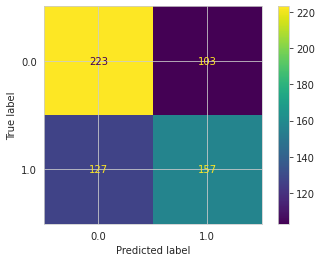

In [50]:
# train
print('LR Model - Train')
plot_confusion_matrix(model, X_train, y_train);

LR Model - Test


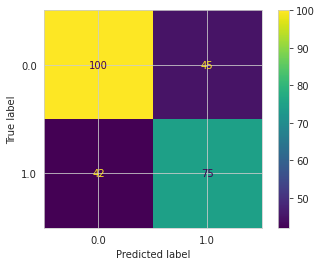

In [51]:
print('LR Model - Test')

plot_confusion_matrix(model, X_test, y_test);

Logistic Regression model AUC for the Training Data: 0.701
Logistic Regression model AUC for the Test Data: 0.688


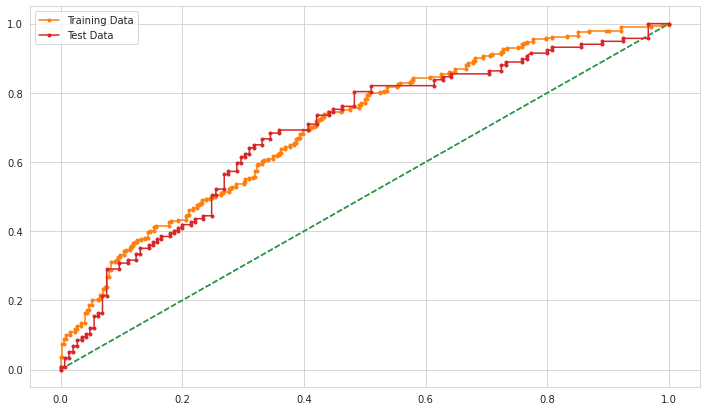

In [52]:
# AUC and ROC for the training data

# calculate AUC
plt.figure(figsize=(12,7))
auc = roc_auc_score(y_train, train_predict_proba[:,1])
print('Logistic Regression model AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, train_predict_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = roc_auc_score(y_test,test_predict_proba[:,1])
print('Logistic Regression model AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,test_predict_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [53]:
param_grid = {
    'tol': [0.001, 0.01, 0.0001],
    'solver': ['svd', 'lsqr', 'eigen']    
}
model = LDA()

clf = GridSearchCV(model, param_grid, cv=3)

In [54]:
clf.fit(X_train, y_train)

/home/pooja/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pooja/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pooja/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 468, in fit
    self._solve_eigen(X, y, shrinkage=self.shrinkage)
  File "/home/pooja/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 335, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/home/pooja/.local/lib/python3.8/site-packages/scipy/linalg/decomp.py", line 578, in eigh
    raise LinAlgError('The leading minor of order {} of B is not '
numpy.linalg.LinAlgError: The leading minor of order 4 of B is not positive definite. The

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.01, 0.0001]})

In [55]:
lda_model = clf.best_estimator_

In [56]:
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(tol=0.001)

In [57]:
lda_train_predict = lda_model.predict(X_train)
lda_test_predict = lda_model.predict(X_test)
lda_train_predict_proba = lda_model.predict_proba(X_train)
lda_test_predict_proba = lda_model.predict_proba(X_test)

In [58]:
lda_train_accuracy = lda_model.score(X_train, y_train)
lda_train_accuracy

0.6213114754098361

In [59]:
lda_test_accuracy = lda_model.score(X_test, y_test)
lda_test_accuracy

0.6603053435114504

In [60]:
print('Linear Discriminant Analysis model')
print('Accuracy on training data ->', round(lda_train_accuracy, 3))
print('Accuracy on test data ->', round(lda_test_accuracy, 3))

Linear Discriminant Analysis model
Accuracy on training data -> 0.621
Accuracy on test data -> 0.66


In [61]:
print('Train\n')
print(classification_report(y_train, lda_train_predict))

Train

              precision    recall  f1-score   support

         0.0       0.64      0.68      0.66       326
         1.0       0.60      0.55      0.58       284

    accuracy                           0.62       610
   macro avg       0.62      0.62      0.62       610
weighted avg       0.62      0.62      0.62       610



In [62]:
print('Test\n')
print(classification_report(y_test, lda_test_predict))

Test

              precision    recall  f1-score   support

         0.0       0.70      0.68      0.69       145
         1.0       0.61      0.64      0.63       117

    accuracy                           0.66       262
   macro avg       0.66      0.66      0.66       262
weighted avg       0.66      0.66      0.66       262



LDA Model - Train


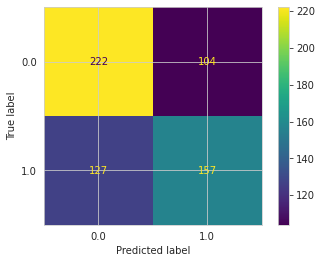

In [63]:
# train
print('LDA Model - Train')
plot_confusion_matrix(lda_model, X_train, y_train);

LDA Model - Test


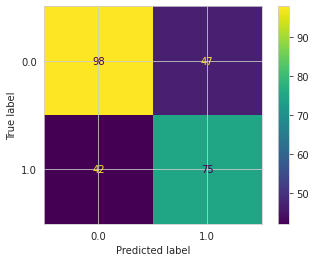

In [64]:
# test
print('LDA Model - Test')
plot_confusion_matrix(lda_model, X_test, y_test);

LDA model AUC for the Training Data: 0.699
LDA model AUC for the Test Data: 0.688


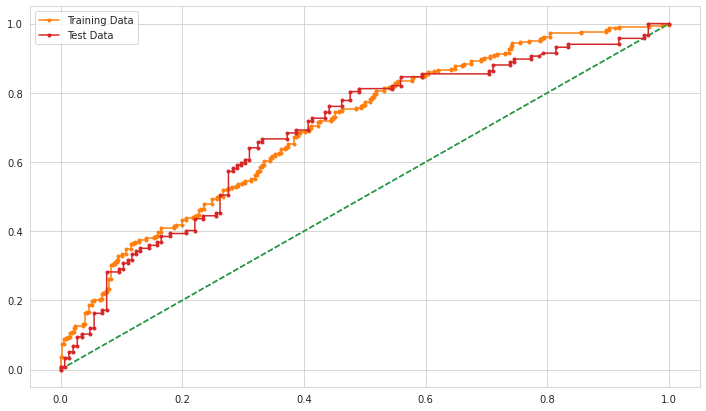

In [65]:
# AUC and ROC for the training data

# calculate AUC
plt.figure(figsize=(12,7))
auc = roc_auc_score(y_train, lda_train_predict_proba[:,1])
print('LDA model AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, lda_train_predict_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = roc_auc_score(y_test,lda_test_predict_proba[:,1])
print('LDA model AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,lda_test_predict_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()